## Anaemia Prediction

![python logo](https://images.ctfassets.net/juauvlea4rbf/54CvRwvQxG2kqMoymGwaOw/f8867a133f290381c2e95365c7c1df93/anemia_fb_2x.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("data.csv")

In [3]:
df.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No


In [4]:
df.tail()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
99,100,F,49.9999,29.2860,20.7141,14.5,Yes
100,101,M,42.2324,30.6757,27.0919,6.3,Yes
101,102,F,45.6064,31.9084,22.4852,12.7,No
102,103,M,45.2095,29.2769,25.5136,13.4,No
103,104,F,43.5706,29.8094,26.6199,12.2,No


In [5]:
df.shape

(104, 7)

In [6]:
df.size

728

In [7]:
df.columns

Index(['Number', 'Sex', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb',
       'Anaemic'],
      dtype='object')

In [8]:
df.dtypes

Number            int64
Sex              object
%Red Pixel      float64
%Green pixel    float64
%Blue pixel     float64
Hb              float64
Anaemic          object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        104 non-null    int64  
 1   Sex           104 non-null    object 
 2   %Red Pixel    104 non-null    float64
 3   %Green pixel  104 non-null    float64
 4   %Blue pixel   104 non-null    float64
 5   Hb            104 non-null    float64
 6   Anaemic       104 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.8+ KB


In [10]:
df.describe()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb
count,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,45.654175,28.875507,25.470325,12.150962
std,30.166206,2.816294,1.554275,1.984671,2.512957
min,1.000000,38.796800,25.140300,19.541300,2.800000
25%,26.750000,43.911375,27.871300,24.896425,10.650000
50%,52.500000,45.385350,28.948750,25.953200,12.600000
75%,78.250000,46.968325,29.887275,26.721600,14.000000
max,104.000000,54.647800,32.368100,29.841400,16.300000


In [11]:
df.corr()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb
Number,1.000000,0.286166,-0.077089,-0.345707,-0.019768
%Red Pixel,0.286166,1.000000,-0.732003,-0.845764,0.424586
%Green pixel,-0.077089,-0.732003,1.000000,0.255589,-0.637340
%Blue pixel,-0.345707,-0.845764,0.255589,1.000000,-0.103373
Hb,-0.019768,0.424586,-0.637340,-0.103373,1.000000


In [12]:
df.isna().sum()

Number          0
Sex             0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.nunique()

Number          104
Sex               4
%Red Pixel      103
%Green pixel    103
%Blue pixel     103
Hb               62
Anaemic           2
dtype: int64

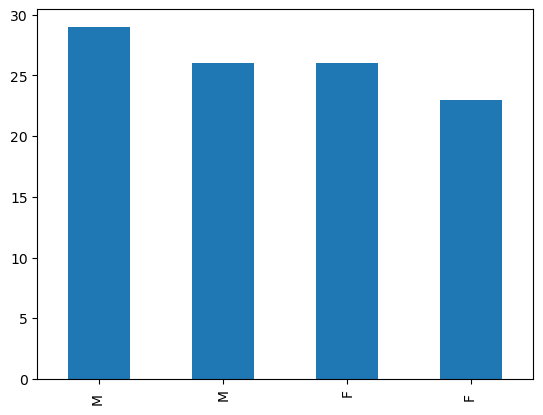

In [15]:
df['Sex'].value_counts().plot.bar()
plt.savefig("The number of males's and female's in the dataset.png")
plt.show()

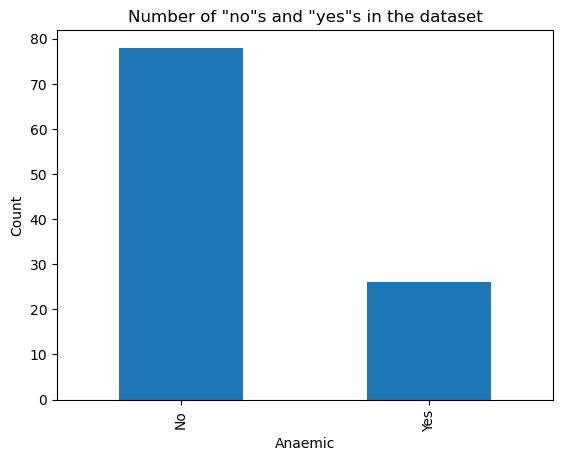

In [17]:
df['Anaemic'].value_counts().plot.bar()
plt.title('Number of "no"s and "yes"s in the dataset')
plt.xlabel('Anaemic')
plt.ylabel('Count')

# Save with a simplified filename
plt.savefig('anaemic_counts.png')
plt.show()

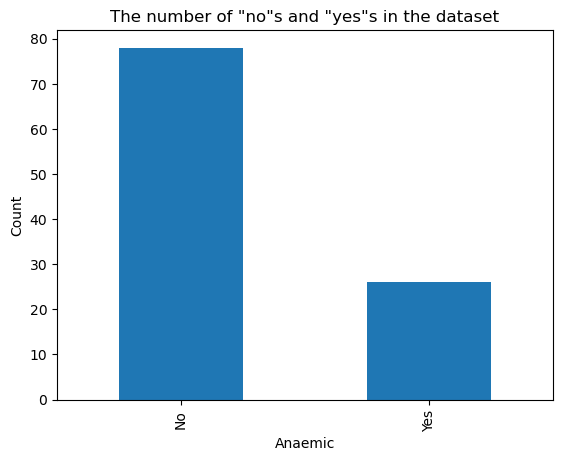

In [18]:
df['Anaemic'].value_counts().plot.bar()
plt.title('The number of "no"s and "yes"s in the dataset')
plt.xlabel('Anaemic')
plt.ylabel('Count')
plt.savefig('The_number_of_nos_and_yess_in_the_dataset.png')  
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Anaemic'] = label_encoder.fit_transform(df['Anaemic'])

In [20]:
df.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,2,43.2555,30.8421,25.9025,6.3,1
1,2,0,45.6033,28.1900,26.2067,13.5,0
2,3,1,45.0107,28.9677,26.0215,11.7,0
3,4,0,44.5398,28.9899,26.4703,13.5,0
4,5,3,43.2870,30.6972,26.0158,12.4,0


In [21]:
x_columns = ['Sex', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb']
y_column = ['Anaemic']

# Extracting the columns from the DataFrame
x = df[x_columns]
y = df[y_column]

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,shuffle = True, random_state=1)

## LogisticRegression

In [23]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [24]:
pred_lr = LR.predict(x_test)
pred_lr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0])

In [25]:
lr_acc = LR.score(x_test,y_test)
lr_acc

0.9523809523809523

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.75      1.00      0.86         3

    accuracy                           0.95        21
   macro avg       0.88      0.97      0.91        21
weighted avg       0.96      0.95      0.96        21



## DecisionTreeClassifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
pred_dt = DT.predict(x_test)

In [29]:
dt_acc = DT.score(x_test,y_test)
dt_acc

1.0

In [30]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         3

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



## GradientBoostingClassifier

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(x_train, y_train)

GradientBoostingClassifier(random_state=0)

In [32]:
predict_gbc = GBC.predict(x_test)
predict_gbc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

In [33]:
gbc_acc = GBC.score(x_test, y_test)
gbc_acc

1.0

In [34]:
print(classification_report(y_test,predict_gbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         3

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



## RandomForestClassifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state=0)
RF.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [36]:
predict_rf = RF.predict(x_test)
predict_rf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

In [37]:
rf_acc = RF.score(x_test, y_test)
rf_acc

1.0

In [38]:
print(classification_report(y_test,predict_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         3

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



## KNeighborsClassifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [40]:
predict_knn = KNN.predict(x_test)
predict_knn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

In [41]:
knn_acc = KNN.score(x_test, y_test)
knn_acc

1.0

In [42]:
print(classification_report(y_test,predict_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         3

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



## GaussianNB 

In [43]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [44]:
predict_Gnb = gnb.predict(x_test)
predict_Gnb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0])

In [45]:
gnb_acc = gnb.score(x_test, y_test)
gnb_acc

0.9523809523809523

In [46]:
print(classification_report(y_test,predict_Gnb))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.75      1.00      0.86         3

    accuracy                           0.95        21
   macro avg       0.88      0.97      0.91        21
weighted avg       0.96      0.95      0.96        21



In [47]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression','Decision Tree Classifier', 'GradientBoostingClassifier','Random Forest Classifier','GaussianNB'],
    'Accuracy Score' : [lr_acc, dt_acc, gbc_acc, rf_acc,gnb_acc ]})
     
    
models.sort_values(by = 'Accuracy Score', ascending = False)

,Model,Accuracy Score
1,Decision Tree Classifier,1.000000
2,GradientBoostingClassifier,1.000000
3,Random Forest Classifier,1.000000
0,Logistic Regression,0.952381
4,GaussianNB,0.952381


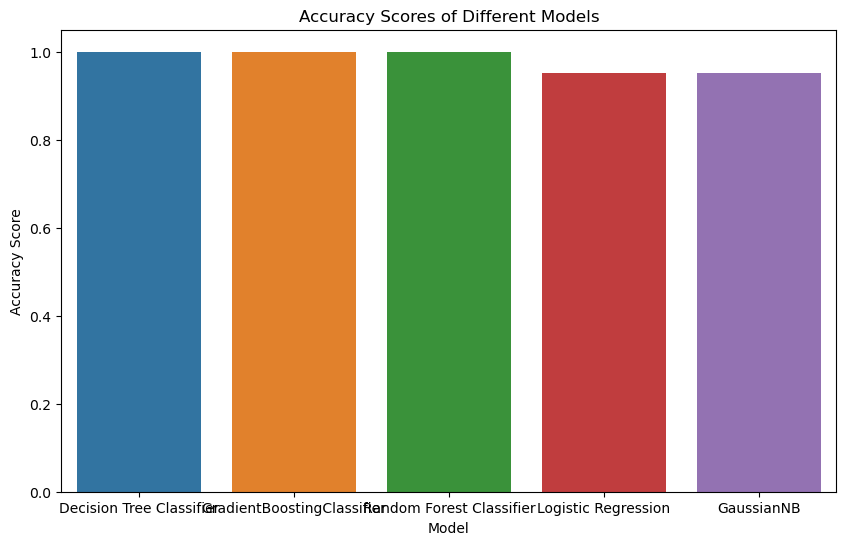

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(data=models.sort_values(by = 'Accuracy Score', ascending = False), x='Model', y='Accuracy Score')
plt.title('Accuracy Scores of Different Models')
plt.ylabel('Accuracy Score')
plt.savefig("Accuracy Scores of Different Models.png")
plt.show()

1. Decision Tree Classifier, GradientBoostingClassifier, and Random Forest Classifier all achieved a perfect accuracy score of 1.000, indicating they performed flawlessly on the given dataset. This suggests they were able to learn and predict the data with high precision.

2. Logistic Regression and GaussianNB achieved an accuracy score of 0.952, indicating they also performed well but were slightly less accurate compared to the top three classifiers. Despite this, they still demonstrated strong performance in predicting the dataset.

## Conclusion:
The models tested show varying degrees of performance, with Decision Tree, Gradient Boosting, and Random Forest classifiers standing out for achieving perfect accuracy. Logistic Regression and Gaussian Naive Bayes, while slightly less accurate, still performed admirably. The choice of which model to use would depend on other factors such as interpretability, computational efficiency, and the specific requirements of the application.